In [1]:
# setup
import pandas as pd
import matplotlib.pyplot as plt

import MyFunctions as f

In [2]:
train = pd.read_csv("data/aps_failure_training_set.csv")
test = pd.read_csv("data/aps_failure_test_set.csv")

# basic prepocessing
"""format classes as pos: 1, neg: 0
convert na in NaN values"""
train = f.data_prepro(train)
test = f.data_prepro(test)

# null values
"""drop features with more than t% of NaN on the trainset
fill the remaining nulls with the mean of the column"""
[y_train, X_train, y_test, X_test] = f.null_values(train, test, t=0.5)

# standarize
X_train, X_test = f.standardize(X_train, X_test)

# feature selection
X_train = f.feature_selection(X_train, y_train)
X_test = X_test[X_train.columns]

In [3]:
# save the csv 
train_res = pd.DataFrame(data = X_train.values, columns = X_train.columns)
train_res.insert(loc=0, column='class', value=y_train)
name = "No resampling"
train_res.to_csv("train_after_resample/"+name+".csv", index=False) 

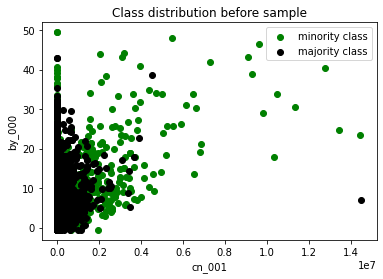

In [4]:
f.scatter_2features(X_train, y_train, "Class distribution before sample")

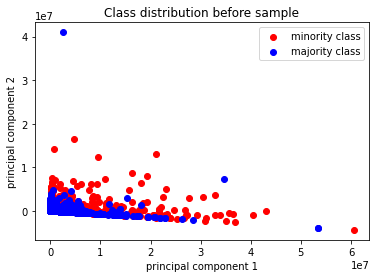

In [5]:
f.PCA_4vis(X_train, y_train, "Class distribution before sample")

## Sampling Techniques

In [6]:
def resample(technique, name, X_train, y_train):
    print("\033[1m" + name + "\033[0m")
    
    X_res, y_res = technique.fit_resample(X_train, y_train)
    
    print("class distribution after "+ name)
    print(sorted(Counter(y_res).items()))
    
    f.scatter_2features(X_res, y_res, "Class distribution after "+ name)
    f.PCA_4vis(X_res, y_res, "Class distribution after "+ name)
    
    return X_res, y_res

In [7]:
from imblearn.over_sampling import (RandomOverSampler, ADASYN, SMOTE, BorderlineSMOTE, KMeansSMOTE, SVMSMOTE)
from imblearn.under_sampling import (ClusterCentroids, RandomUnderSampler, NearMiss, EditedNearestNeighbours,
                                     TomekLinks,  OneSidedSelection, InstanceHardnessThreshold)
from imblearn.combine import (SMOTEENN, SMOTETomek)
from collections import Counter
from sklearn.linear_model import LogisticRegression

In [8]:
sampling_techniques = [RandomOverSampler(random_state=333),
                    SMOTE(random_state=333),
                    ADASYN(random_state=333),
                    BorderlineSMOTE(random_state=333, kind='borderline-1'),
                    BorderlineSMOTE(random_state=333, kind='borderline-2'),
                    KMeansSMOTE(random_state=333),
                    SVMSMOTE(random_state=333),
                    ClusterCentroids(random_state=333), # prototype generation
                    RandomUnderSampler(random_state=333), # controlled under-sampling techniques
                    NearMiss(version=3), # controlled under-sampling techniques
                    EditedNearestNeighbours(),  # cleaning under-sampling techniques
                    TomekLinks(), # cleaning under-sampling techniques
                    OneSidedSelection(random_state=333), # cleaning under-sampling techniques
                    InstanceHardnessThreshold(random_state=333, # cleaning under-sampling techniques
                                              estimator=LogisticRegression(solver='lbfgs', multi_class='auto')), 
                    SMOTEENN(random_state=333), # SMOTE + ENN
                    SMOTETomek(random_state=333)] # SMOTE + Tomek Links

In [9]:
names = ["Random Over-Sampler",
        "SMOTE",
        "ADASYN",
        "Border Line SMOTE 1",
        "Border Line SMOTE 2",
        "k-Means SMOTE",
        "SVM SMOTE",
        "Cluster Centroids",
        "Random Under-Sampler",
        "NearMiss",
        "Edited Nearest Neighbours",
        "Tomek Links",
        "OneSidedSelection",
        "Instance Hardness Threshold",
        "SMOTE and cleaning using ENN",
        "SMOTE and cleaning using Tomek links"]

Random Over-Sampler
class distribution after Random Over-Sampler
[(0, 59000), (1, 59000)]


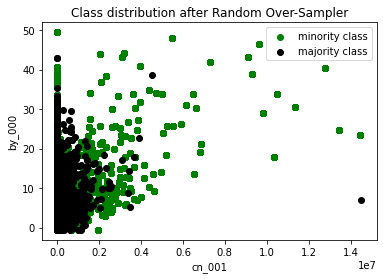

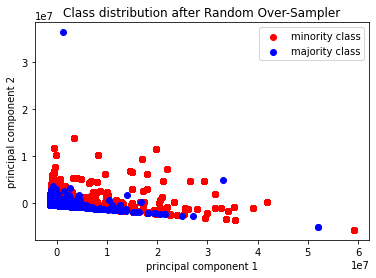

SMOTE
class distribution after SMOTE
[(0, 59000), (1, 59000)]


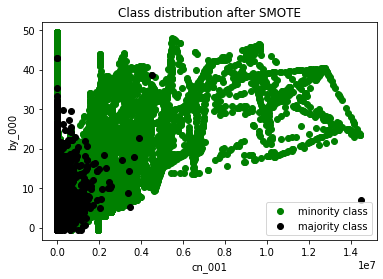

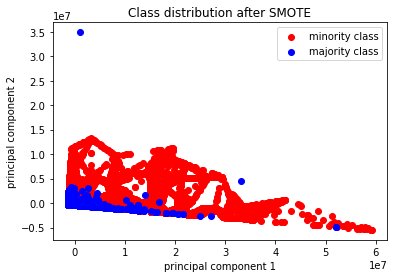

ADASYN
class distribution after ADASYN
[(0, 59000), (1, 58919)]


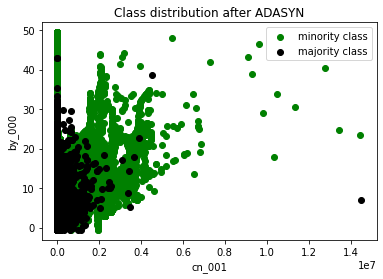

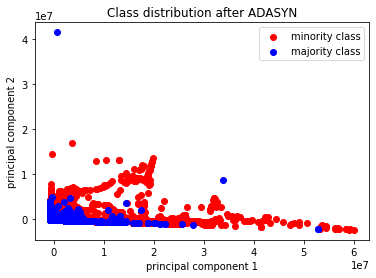

Border Line SMOTE 1
class distribution after Border Line SMOTE 1
[(0, 59000), (1, 59000)]


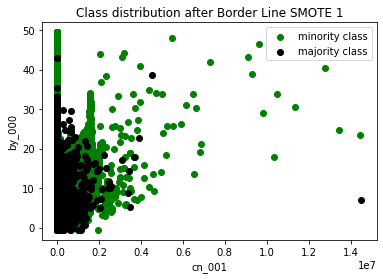

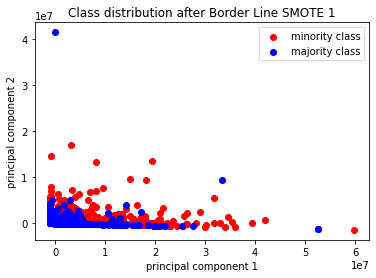

Border Line SMOTE 2
class distribution after Border Line SMOTE 2
[(0, 59000), (1, 59000)]


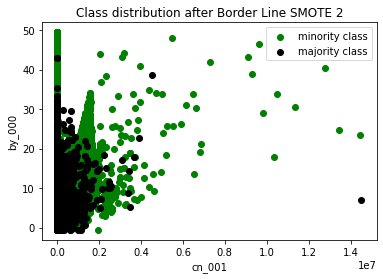

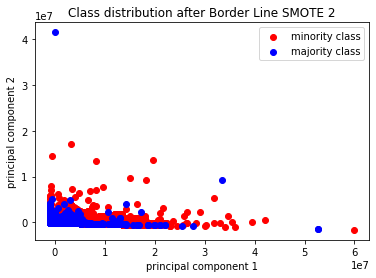

k-Means SMOTE
class distribution after k-Means SMOTE
[(0, 59000), (1, 59000)]


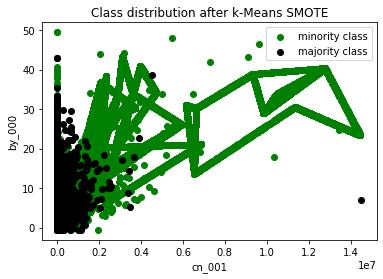

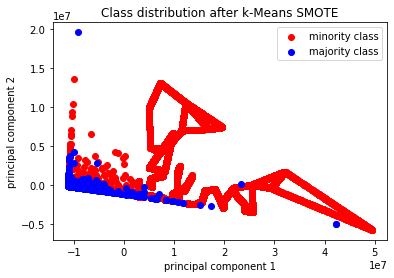

SVM SMOTE
class distribution after SVM SMOTE
[(0, 59000), (1, 59000)]


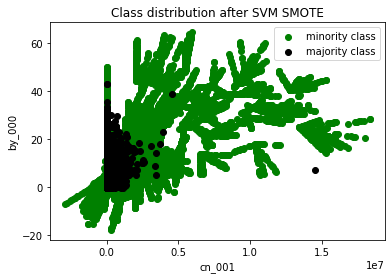

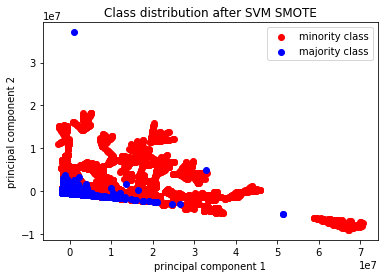

Cluster Centroids
class distribution after Cluster Centroids
[(0, 1000), (1, 1000)]


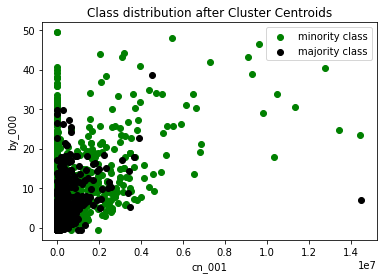

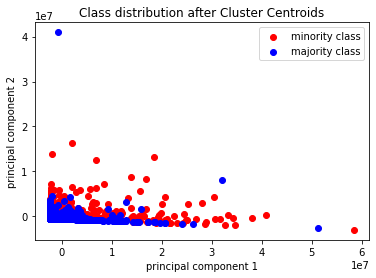

Random Under-Sampler
class distribution after Random Under-Sampler
[(0, 1000), (1, 1000)]


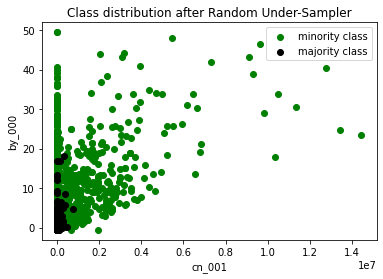

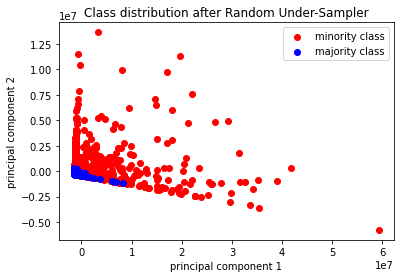

NearMiss
class distribution after NearMiss
[(0, 1000), (1, 1000)]


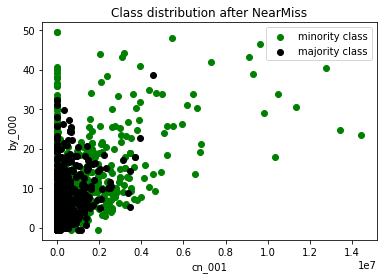

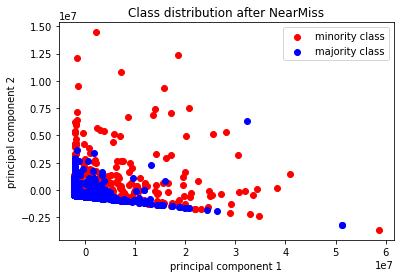

Edited Nearest Neighbours
class distribution after Edited Nearest Neighbours
[(0, 58076), (1, 1000)]


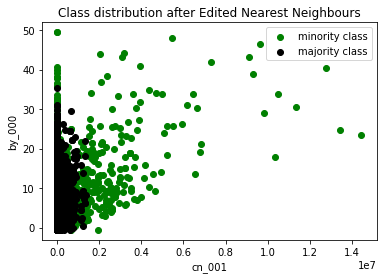

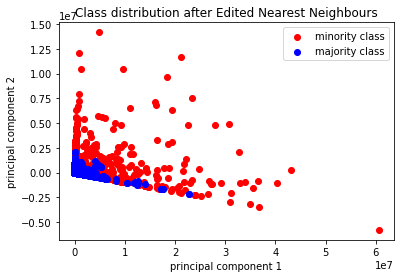

Tomek Links
class distribution after Tomek Links
[(0, 58847), (1, 1000)]


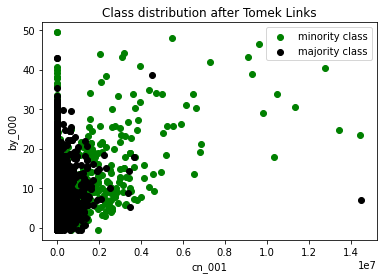

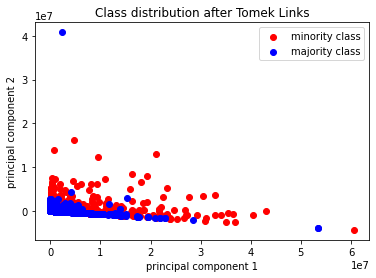

OneSidedSelection
class distribution after OneSidedSelection
[(0, 56776), (1, 1000)]


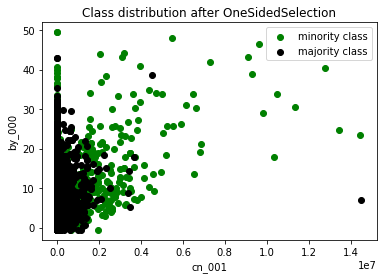

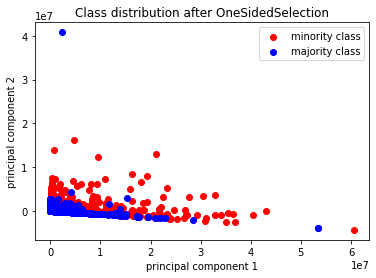

Instance Hardness Threshold
class distribution after Instance Hardness Threshold
[(0, 1000), (1, 1000)]


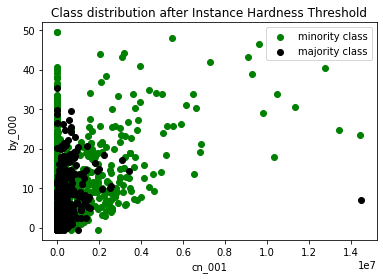

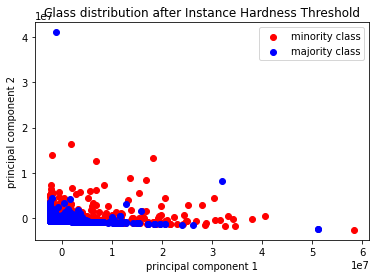

SMOTE and cleaning using ENN
class distribution after SMOTE and cleaning using ENN
[(0, 55547), (1, 56760)]


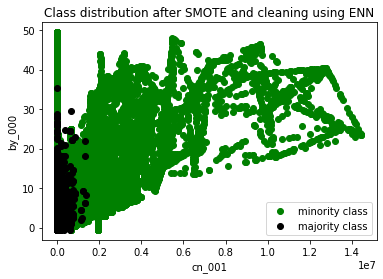

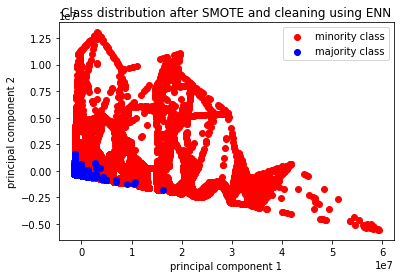

SMOTE and cleaning using Tomek links
class distribution after SMOTE and cleaning using Tomek links
[(0, 58661), (1, 58661)]


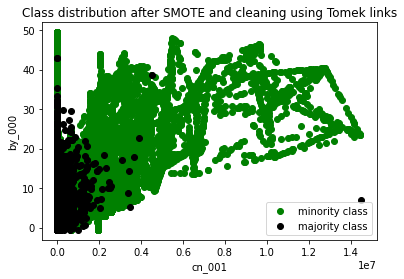

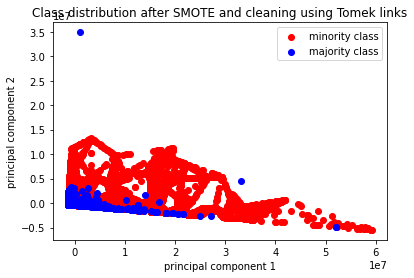

In [10]:
for t in zip(sampling_techniques, names):
    train = pd.read_csv("data/aps_failure_training_set.csv")
    test = pd.read_csv("data/aps_failure_test_set.csv")

    # basic prepocessing
    train = f.data_prepro(train)
    test = f.data_prepro(test)

    # null values
    [y_train, X_train, y_test, X_test] = f.null_values(train, test, t=0.5)

    # standarize
    X_train, X_test = f.standardize(X_train, X_test)

    # feature selection
    X_train = f.feature_selection(X_train, y_train)
    X_test = X_test[X_train.columns]
    
    # resample tecnique
    X_res, y_res = resample(t[0], t[1], X_train, y_train)
    
    # save the csv 
    train_res = pd.DataFrame(data = X_res.values, columns = X_res.columns)
    train_res.insert(loc=0, column='class', value=y_res)
    name = t[1]
    train_res.to_csv("train_after_resample/"+name+".csv", index=False) 